In [165]:
def sparse_to_tuple(sparse_mx):
    if not sp.isspmatrix_coo(sparse_mx):
        sparse_mx = sparse_mx.tocoo()
    coords = np.vstack((sparse_mx.row, sparse_mx.col)).transpose()
    values = sparse_mx.data
    shape = sparse_mx.shape
    return coords, values, shape

In [166]:
import networkx as nx
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

In [167]:
G = nx.read_edgelist('../Data/Interactome/huri_apid_merge_ppis_edgelist.csv')

adj = nx.adjacency_matrix(G)
adj_orig = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
adj_orig.eliminate_zeros()

G_norm = nx.from_scipy_sparse_matrix(adj_orig)
adj_norm = nx.normalized_laplacian_matrix(G_norm)
adj_orig_norm = adj_norm - sp.dia_matrix((adj_norm.diagonal()[np.newaxis, :], [0]), shape=adj_norm.shape)
adj_orig_norm.eliminate_zeros()

adj_triu_orig = sp.triu(adj_orig)
adj_triu_orig_norm = sp.triu(adj_orig_norm)

In [168]:
print(adj_triu_orig.count_nonzero())
print(adj_triu_orig_norm.count_nonzero())

110051
110051


Text(0, 0.5, 'Frequency')

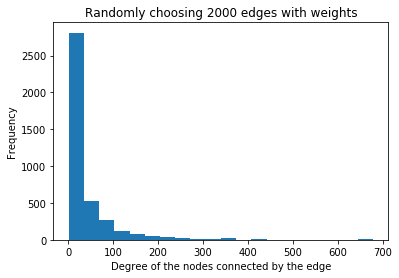

In [227]:
probs = (matrix_tuples[1]/sum(matrix_tuples[1]))

idx = list(range(len(probs)))
random_set = np.random.choice(idx, size=2000, replace=False, p=probs)
chosen_nodes = matrix_tuples[0][random_set].flatten()
plt.hist([G.degree(x) for x in np.array(list(G.nodes()))[chosen_nodes]], bins=20)
plt.title('Randomly choosing 2000 edges with weights')
plt.xlabel('Degree of the nodes connected by the edge')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

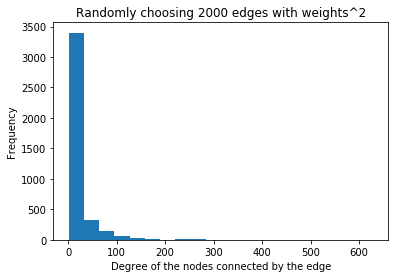

In [228]:
probs = ((matrix_tuples[1]**2)/sum(matrix_tuples[1]**2))

idx = list(range(len(probs)))
random_set = np.random.choice(idx, size=2000, replace=False, p=probs)
chosen_nodes = matrix_tuples[0][random_set].flatten()
plt.hist([G.degree(x) for x in np.array(list(G.nodes()))[chosen_nodes]], bins=20)
plt.title('Randomly choosing 2000 edges with weights^2')
plt.xlabel('Degree of the nodes connected by the edge')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

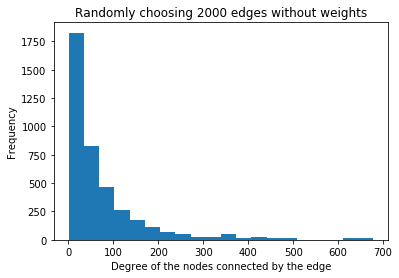

In [229]:
matrix_tuples = sparse_to_tuple(adj_triu_orig_norm)
probs = (matrix_tuples[1]/sum(matrix_tuples[1]))

idx = list(range(len(probs)))
random_set = np.random.choice(idx, size=2000, replace=False)
chosen_nodes = matrix_tuples[0][random_set].flatten()
plt.hist([G.degree(x) for x in np.array(list(G.nodes()))[chosen_nodes]], bins=20)
plt.title('Randomly choosing 2000 edges without weights')
plt.xlabel('Degree of the nodes connected by the edge')
plt.ylabel('Frequency')